**Импорт всех необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

# 1. Исследовательский анализ данных (exploratory data analysis - EDA)

## 1.1 Словесное описание признаков

- id: id транзакции  
- timestamp: дата продажи (транзакции)  
- full_sq: общая площадь  
- life_sq: жилая площадь  
- floor: этаж  
- max_floor: количество этажей в здании  
- material: материал, из которого изговолены стены  
- build_year: год строительства  
- num_room: количество жилых комнат  
- kitch_sq: площадь кухни  
- full_all: количество населения в регионе  
- state: жилищные условия  
- sub_area: название территории  
- price_doc: цена квартиры (целевая переменная) 

## 1.2 Загрузка данных общее описание набора данных
* Первый взгляд на данные: head(), tail(), sample()
* Размер набора данных
* Баланс классов в целевом признаке при классфикации. Диапазон данных и базовые статистические метрики целевого признака при регерессии
* Базовые статистики по числовым данным
* Базовые статистики по строковым данным
* Наличие пропусков в данных

In [3]:
df = pd.read_csv("train.csv")
df.head()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,13324,2013-12-23,42,28.0,8.0,2.0,9.0,1.0,1969.0,2.0,6.0,43795,Pechatniki,7100000
1,10064,2013-08-26,55,41.0,4.0,3.0,5.0,2.0,1960.0,3.0,5.0,21040,Dorogomilovo,11500000
2,12022,2013-11-11,43,29.0,4.0,2.0,5.0,2.0,1960.0,2.0,5.0,157010,Ivanovskoe,5800000
3,10186,2013-08-30,62,35.0,15.0,NaN,22.0,1.0,1985.0,2.0,10.0,178264,Jasenevo,11400000
4,30052,2015-05-29,80,55.0,15.0,1.0,24.0,6.0,2017.0,3.0,12.0,76284,Nagatinskij Zaton,12697154


In [90]:
df.tail()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
15087,23382,2014-10-08,69,48.0,2.0,2.0,4.0,2.0,1950.0,3.0,7.0,101982,Tekstil'shhiki,9100000
15088,24264,2014-10-31,78,75.0,4.0,1.0,17.0,1.0,2014.0,3.0,1.0,247469,Nekrasovka,7722400
15089,16165,2014-03-18,38,19.0,15.0,3.0,17.0,1.0,1990.0,1.0,8.0,101708,Juzhnoportovoe,7000000
15090,10635,2013-09-20,54,32.0,11.0,3.0,16.0,1.0,1979.0,2.0,9.0,178264,Jasenevo,7000000
15091,29081,2015-04-13,154,108.0,14.0,3.0,18.0,4.0,2006.0,4.0,5.0,80791,Horoshevskoe,50000000


In [91]:
df.sample()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
13164,30039,2015-05-29,48,30.0,9.0,1.0,9.0,5.0,1973.0,2.0,7.0,76284,Nagatinskij Zaton,9000000


In [92]:
print(df.shape)

(15092, 14)


In [93]:
df['price_doc'].value_counts()

2000000     456
1000000     395
3000000     228
6000000     202
6500000     200
           ... 
7340000       1
7047460       1
3534660       1
4577444       1
10170000      1
Name: price_doc, Length: 4188, dtype: int64

Баланс классов тяготеет в сторону относительно дешевых квартир, 1-2-3 миллиона за квартиру

In [94]:
df.describe()

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc
count,15092.0000,15092.000,13828.0000,15069.0000,12366.0000,13938.0000,13938.0000,13938.0000,13938.0000,1.5092e+04,1.5092e+04
mean,18772.4277,53.967,33.7849,7.2833,2.1949,12.4191,1.8958,1.9348,7.2806,1.5923e+05,7.5647e+06
std,7102.9068,48.082,19.7944,5.1940,0.8610,6.2642,1.5114,0.8657,30.0719,3.0380e+05,4.9852e+06
min,15.0000,0.000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.5460e+03,3.3146e+05
25%,13464.7500,38.000,20.0000,3.0000,2.0000,9.0000,1.0000,1.0000,5.0000,4.8439e+04,5.1000e+06
50%,19005.5000,49.000,30.0000,6.0000,2.0000,12.0000,1.0000,2.0000,7.0000,8.7713e+04,6.6500e+06
75%,24746.2500,63.000,43.0000,10.0000,3.0000,17.0000,2.0000,3.0000,9.0000,1.2535e+05,8.9000e+06
max,30473.0000,5326.000,637.0000,77.0000,33.0000,57.0000,6.0000,19.0000,2014.0000,1.7167e+06,9.5122e+07


* Максимальные значения площади пространства квартир full_sq, life_sq и kitch_sq слишком большие: (5326.000, 637.0000, 2014.0000). Максимальное значение количества комнат в квартире num_room равно 19, что тоже слишком много, чтобы быть правдой. Данные некорректны или это точечные, резкие отклонения от общей выборки.
* Оценка жилищных условий в виде числа ничего не значит
* 75% всех квартир расположены на 10 этаже или ниже
* Значения площади пространства квартир full_sq и life_sq содержат нулевые значения, чего быть не может
* Значение количества жилых комнат num_room содержит нулевые значения, чего быть не может
* Материал стен material представлен в виде числа, которое без дополнительной таблицы соответствия числа и названия материала не имеет смысла
* 75% всех квартир расположена в зданиях, в которых 17 этажей или меньше (параметр max_floor)
* 75% всех квартир расположены в регионе с количеством населения full_all 125 тысяч или меньше

In [95]:
df.describe(include=(object))

,timestamp,build_year,sub_area
count,15092,13475,15092
unique,1031,116,146
top,2014-12-16,2014.0,Poselenie Sosenskoe
freq,99,733,502


In [96]:
df['build_year']

0        1969.0
1        1960.0
2        1960.0
3        1985.0
4        2017.0
          ...  
15087    1950.0
15088    2014.0
15089    1990.0
15090    1979.0
15091    2006.0
Name: build_year, Length: 15092, dtype: object

Object:
* Время постройки здания build_year
* Дата timestamp
* Название подрегиона sub_area

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15092 non-null  int64  
 1   timestamp   15092 non-null  object 
 2   full_sq     15092 non-null  int64  
 3   life_sq     13828 non-null  float64
 4   floor       15069 non-null  float64
 5   state       12366 non-null  float64
 6   max_floor   13938 non-null  float64
 7   material    13938 non-null  float64
 8   build_year  13475 non-null  object 
 9   num_room    13938 non-null  float64
 10  kitch_sq    13938 non-null  float64
 11  full_all    15092 non-null  int64  
 12  sub_area    15092 non-null  object 
 13  price_doc   15092 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 1.6+ MB


* В данных присутствует пустые значения
* Содержат пустые значения столбцы: life_sq, floor, state, max_floor, material, build_year, num_room, kitch_sq
* Не содержат пустые значения столбцы: id, timestamp, full_sq, full_all, sub_area, price_doc
* Количество пустых значений варьируется от двух десятков (floor, 23 пустых значения) до порядка нескольких тысяч (state, 2726 пустых значения)

## Выбросы

In [98]:
df.select_dtypes(include=["int", "float"])

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc
0,13324,42,28.0,8.0,2.0,9.0,1.0,2.0,6.0,43795,7100000
1,10064,55,41.0,4.0,3.0,5.0,2.0,3.0,5.0,21040,11500000
2,12022,43,29.0,4.0,2.0,5.0,2.0,2.0,5.0,157010,5800000
3,10186,62,35.0,15.0,NaN,22.0,1.0,2.0,10.0,178264,11400000
4,30052,80,55.0,15.0,1.0,24.0,6.0,3.0,12.0,76284,12697154
...,...,...,...,...,...,...,...,...,...,...,...
15087,23382,69,48.0,2.0,2.0,4.0,2.0,3.0,7.0,101982,9100000
15088,24264,78,75.0,4.0,1.0,17.0,1.0,3.0,1.0,247469,7722400
15089,16165,38,19.0,15.0,3.0,17.0,1.0,1.0,8.0,101708,7000000
15090,10635,54,32.0,11.0,3.0,16.0,1.0,2.0,9.0,178264,7000000


In [99]:
df.select_dtypes(include=["int", "float"]).describe()

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc
count,15092.0000,15092.000,13828.0000,15069.0000,12366.0000,13938.0000,13938.0000,13938.0000,13938.0000,1.5092e+04,1.5092e+04
mean,18772.4277,53.967,33.7849,7.2833,2.1949,12.4191,1.8958,1.9348,7.2806,1.5923e+05,7.5647e+06
std,7102.9068,48.082,19.7944,5.1940,0.8610,6.2642,1.5114,0.8657,30.0719,3.0380e+05,4.9852e+06
min,15.0000,0.000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.5460e+03,3.3146e+05
25%,13464.7500,38.000,20.0000,3.0000,2.0000,9.0000,1.0000,1.0000,5.0000,4.8439e+04,5.1000e+06
50%,19005.5000,49.000,30.0000,6.0000,2.0000,12.0000,1.0000,2.0000,7.0000,8.7713e+04,6.6500e+06
75%,24746.2500,63.000,43.0000,10.0000,3.0000,17.0000,2.0000,3.0000,9.0000,1.2535e+05,8.9000e+06
max,30473.0000,5326.000,637.0000,77.0000,33.0000,57.0000,6.0000,19.0000,2014.0000,1.7167e+06,9.5122e+07


<AxesSubplot:xlabel='full_sq'>

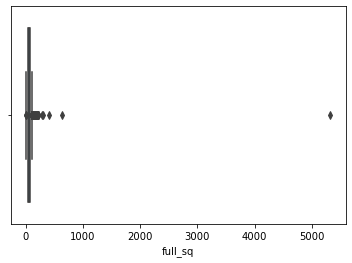

In [85]:
sns.boxplot(x=df["full_sq"])
# sns.boxplot(x=df["kitch_sq"]) примерно то же самое
# sns.boxplot(x=df["life_sq"]) примерно то же самое

<AxesSubplot:xlabel='floor'>

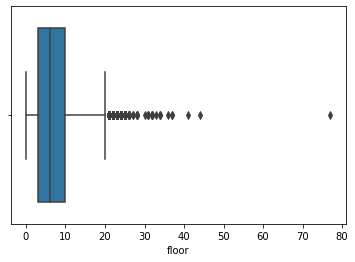

In [101]:
sns.boxplot(x=df["floor"])
# sns.boxplot(x=df["max_floor"]) примерно то же самое

<AxesSubplot:xlabel='material'>

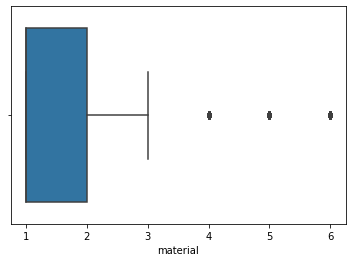

In [102]:
# sns.boxplot(x=df["state"]) примерно то же самое
sns.boxplot(x=df["material"])
# sns.boxplot(x=df["num_room"]) примерно то же самое

<AxesSubplot:xlabel='full_all'>

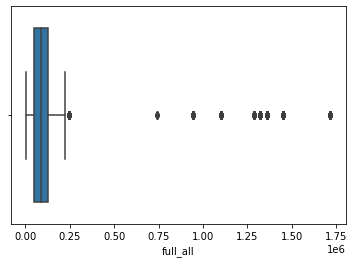

In [103]:
sns.boxplot(x=df["full_all"])

<AxesSubplot:xlabel='price_doc'>

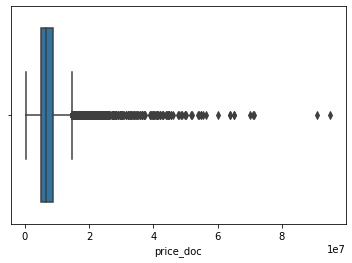

In [104]:
sns.boxplot(x=df["price_doc"])

## 1.3 Визуальный и статистический анализ данных

<AxesSubplot:xlabel='price_doc', ylabel='Count'>

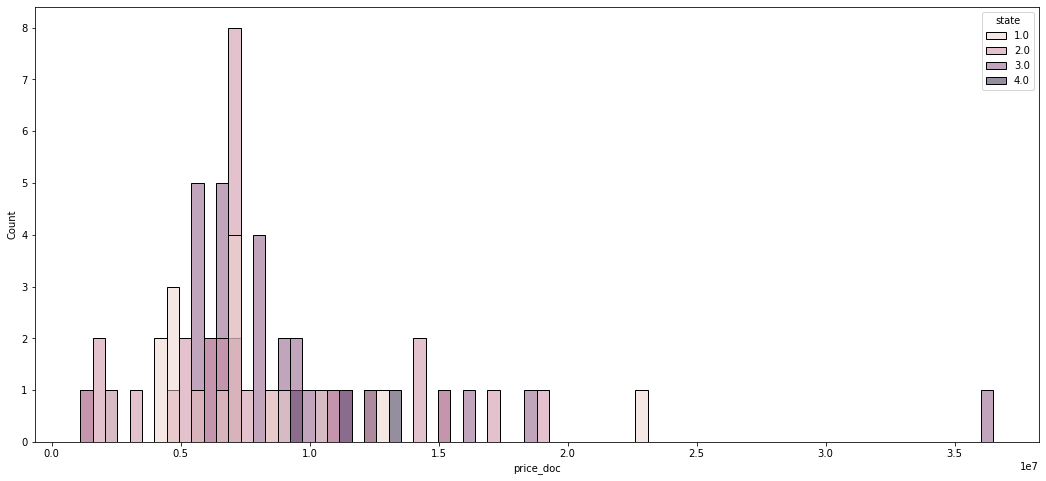

In [105]:
plt.figure(figsize=(18,8))
sns.histplot(data=df.head(100), x="price_doc", hue="state", bins=74)

Прямой зависимости между числом "состояния" квартиры и стоимостью квартиры не видно

In [106]:
plt.figure(figsize=(18,8))
sns.histplot(data=df, x="price_doc", hue="material", bins=74)

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc
count,15092.0000,15092.000,13828.0000,15069.0000,12366.0000,13938.0000,13938.0000,13938.0000,13938.0000,1.5092e+04,1.5092e+04
mean,18772.4277,53.967,33.7849,7.2833,2.1949,12.4191,1.8958,1.9348,7.2806,1.5923e+05,7.5647e+06
std,7102.9068,48.082,19.7944,5.1940,0.8610,6.2642,1.5114,0.8657,30.0719,3.0380e+05,4.9852e+06
min,15.0000,0.000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.5460e+03,3.3146e+05
25%,13464.7500,38.000,20.0000,3.0000,2.0000,9.0000,1.0000,1.0000,5.0000,4.8439e+04,5.1000e+06
50%,19005.5000,49.000,30.0000,6.0000,2.0000,12.0000,1.0000,2.0000,7.0000,8.7713e+04,6.6500e+06
75%,24746.2500,63.000,43.0000,10.0000,3.0000,17.0000,2.0000,3.0000,9.0000,1.2535e+05,8.9000e+06
max,30473.0000,5326.000,637.0000,77.0000,33.0000,57.0000,6.0000,19.0000,2014.0000,1.7167e+06,9.5122e+07


Квартиры от 0 до 20 миллионов построены в основном из материала 1

<AxesSubplot:xlabel='price_doc', ylabel='floor'>

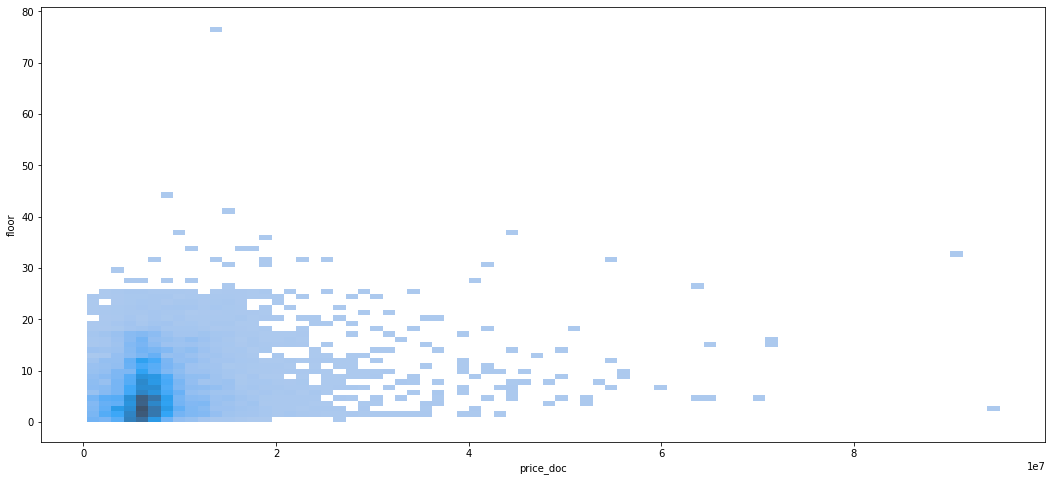

In [107]:
plt.figure(figsize=(18,8))
sns.histplot(data=df, x="price_doc", y='floor', bins=74)

Квартиры в основном находятся в квадрате от 0 до 20 миллионов на первых этажах здания (0-10 этажи)

<AxesSubplot:xlabel='price_doc', ylabel='num_room'>

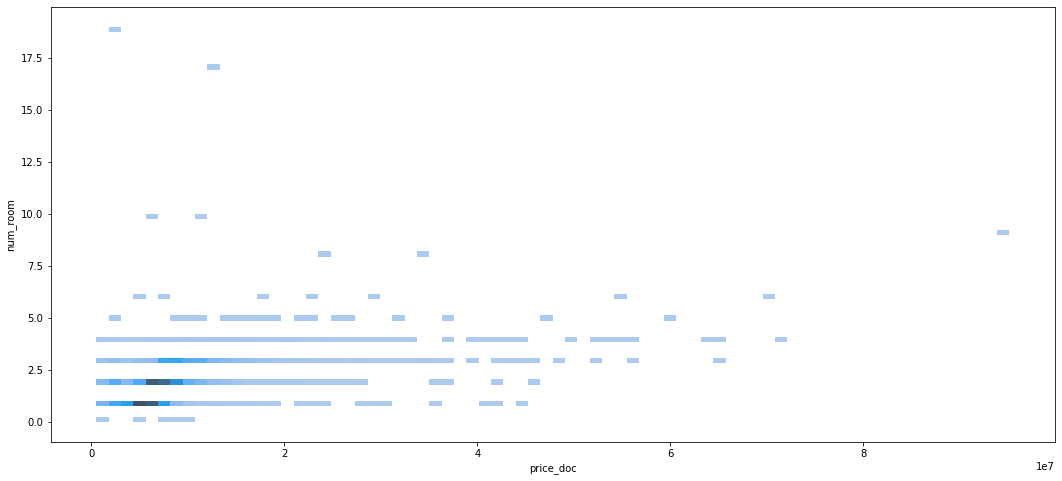

In [108]:
plt.figure(figsize=(18,8))
sns.histplot(data=df, x="price_doc", y='num_room', bins=74)

Квартиры в основном находятся в квадрате от 0 до 20 миллионов с количеством жилых комнат выше 0 и до 3

# 2. Заполнение пропусков и обработка выбросов в данных

## Пропуски в данных

In [237]:
df['build_year'].fillna(value=df['build_year'].mode().values[0], inplace=True)

df['life_sq'].fillna(value=df['life_sq'].mode().values[0], inplace=True)
df['floor'].fillna(value=df['floor'].mode().values[0], inplace=True)
df['state'].fillna(value=df['state'].mode().values[0], inplace=True)
df['max_floor'].fillna(value=df['max_floor'].mode().values[0], inplace=True)
df['material'].fillna(value=df['material'].mode().values[0], inplace=True)
df['num_room'].fillna(value=df['num_room'].min(), inplace=True)
df['kitch_sq'].fillna(value=df['kitch_sq'].min(), inplace=True)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15092 non-null  int64  
 1   timestamp   15092 non-null  object 
 2   full_sq     15092 non-null  int64  
 3   life_sq     15092 non-null  float64
 4   floor       15092 non-null  float64
 5   state       15092 non-null  float64
 6   max_floor   15092 non-null  float64
 7   material    15092 non-null  float64
 8   build_year  15092 non-null  object 
 9   num_room    15092 non-null  float64
 10  kitch_sq    15092 non-null  float64
 11  full_all    15092 non-null  int64  
 12  sub_area    15092 non-null  object 
 13  price_doc   15092 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 1.6+ MB


In [239]:
dfc = df.copy()
dfc.sample(3)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
13073,27553,2015-01-27,60,32.0,18.0,1.0,18.0,1.0,2013.0,1.0,1.0,96959,Levoberezhnoe,6497700
2424,20332,2014-06-28,43,19.0,8.0,2.0,20.0,1.0,2014.0,1.0,1.0,17790,Poselenie Vnukovskoe,5302036
9177,17065,2014-04-07,41,21.0,3.0,2.0,12.0,1.0,1979.0,1.0,8.0,142462,Mozhajskoe,6100000


## Ликвидация выбросов

In [8]:
def search_outliers(feature):
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (np.where((feature < lower_bound) 
            | (feature > upper_bound))[0])

In [74]:
for i in ['full_sq', 'kitch_sq', 'life_sq']:
    outliers = search_outliers(dfc[i])
    dfc_out = dfc.index.isin(outliers)
    sq_mode = dfc[~dfc_out][i].max()

    dfc.loc[outliers, i] = sq_mode

<AxesSubplot:xlabel='full_sq'>

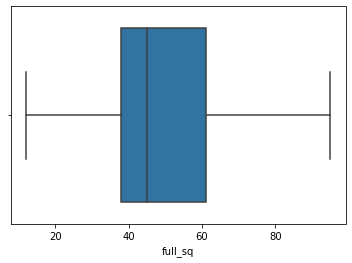

In [81]:
sns.boxplot(x=dfc["full_sq"])

<AxesSubplot:xlabel='kitch_sq'>

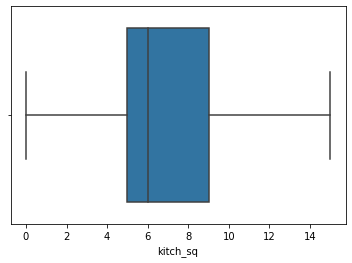

In [82]:
sns.boxplot(x=dfc["kitch_sq"]) 

<AxesSubplot:xlabel='life_sq'>

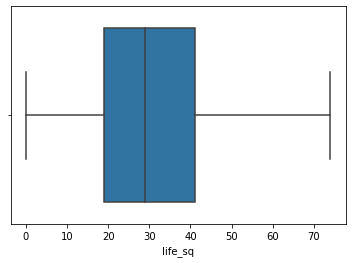

In [84]:
sns.boxplot(x=dfc["life_sq"])

In [ ]:
for i in ['floor', 'max_floor']:
    outliers = search_outliers(dfc[i])
    dfc_out = dfc.index.isin(outliers)
    floor_mode = dfc[~dfc_out][i].max()

    dfc.loc[outliers, i] = floor_mode

<AxesSubplot:xlabel='floor'>

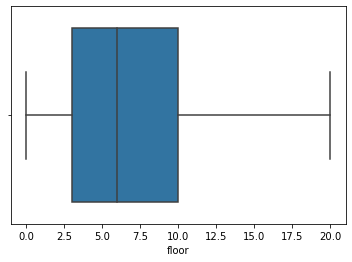

In [104]:
sns.boxplot(x=dfc["floor"])

<AxesSubplot:xlabel='max_floor'>

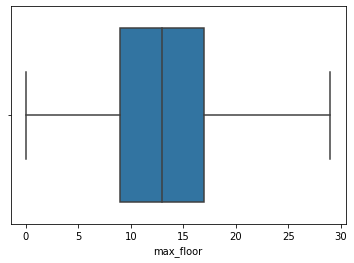

In [112]:
sns.boxplot(x=dfc["max_floor"])

In [113]:
for i in ['state', 'material', 'num_room']:
    outliers = search_outliers(dfc[i])
    dfc_out = dfc.index.isin(outliers)
    st_mode = dfc[~dfc_out][i].max()

    dfc.loc[outliers, i] = st_mode

<AxesSubplot:xlabel='state'>

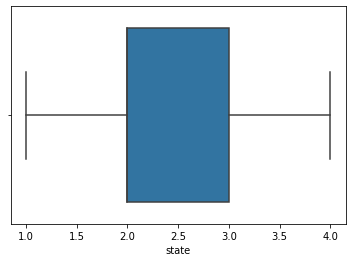

In [114]:
sns.boxplot(x=dfc["state"])

<AxesSubplot:xlabel='material'>

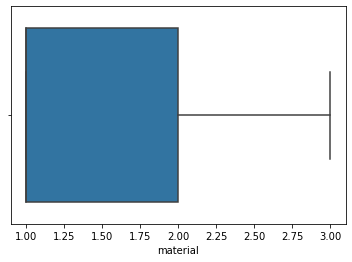

In [115]:
sns.boxplot(x=dfc["material"])

<AxesSubplot:xlabel='num_room'>

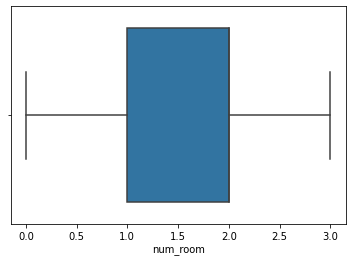

In [117]:
sns.boxplot(x=dfc["num_room"])

In [120]:
outliers = search_outliers(dfc['full_all'])
dfc_out = dfc.index.isin(outliers)
full_all_mode = dfc[~dfc_out]['full_all'].max()

dfc.loc[outliers, 'full_all'] = full_all_mode

<AxesSubplot:xlabel='full_all'>

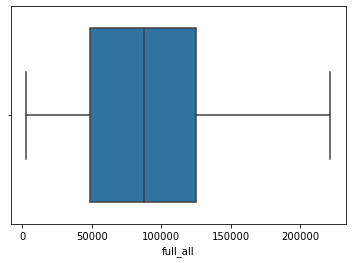

In [121]:
sns.boxplot(x=dfc["full_all"])

# 3. Преобразование признаков

In [229]:
dt = dfc.copy()
dt.sample(3)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
1876,18092,2014-05-04,66,35.0,3.0,2.0,24.0,3.0,2007.0,3.0,9.0,129207,Orehovo-Borisovo Juzhnoe,6000000
5250,18642,2014-05-20,74,45.0,7.0,3.0,17.0,1.0,1985.0,3.0,10.0,105663,Juzhnoe Tushino,14000000
5780,13541,2013-12-30,91,44.0,7.0,1.0,11.0,3.0,2012.0,2.0,15.0,166803,Shhukino,20388410


## 3.1. timestamp

In [182]:
dt['timestamp'] = dt['timestamp'].apply(
    (lambda x: int(''.join(x.split('-')))))

## 3.2 build_year  

In [183]:
build_year_column = pd.to_numeric(
    dt['build_year'], errors='coerce')
dt['build_year'] = build_year_column.fillna(build_year_column.mode()[0])

## 3.3 sub_area    

In [194]:
areas = pd.unique(dt['sub_area'])
for i in range(len(areas)):
    dt.loc[dt['sub_area'] == areas[i], 
           'sub_area'] = i

In [197]:
dt['sub_area'] = pd.to_numeric(dt['sub_area'])

In [230]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15092 non-null  int64  
 1   timestamp   15092 non-null  object 
 2   full_sq     15092 non-null  int64  
 3   life_sq     15092 non-null  float64
 4   floor       15092 non-null  float64
 5   state       15092 non-null  float64
 6   max_floor   15092 non-null  float64
 7   material    15092 non-null  float64
 8   build_year  15092 non-null  object 
 9   num_room    15092 non-null  float64
 10  kitch_sq    15092 non-null  float64
 11  full_all    15092 non-null  int64  
 12  sub_area    15092 non-null  object 
 13  price_doc   15092 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 1.6+ MB


## 3.9 Шкалирование данных

In [199]:
sc = StandardScaler()
X_ = sc.fit_transform(dt.select_dtypes(exclude=(object)))
X_

array([[-0.76709555, -1.09399752, -0.54901561, ..., -0.83574062,
        -1.50657873, -0.09321264],
       [-1.22607778, -1.14946416,  0.19741674, ..., -1.20295711,
        -1.47993462,  0.78943137],
       [-0.95040686, -1.10964554, -0.49159774, ...,  0.99130468,
        -1.4532905 , -0.35399382],
       ...,
       [-0.36710521,  0.17670531, -0.77868711, ...,  0.09884998,
         1.05125606, -0.11327273],
       [-1.1456855 , -1.136331  ,  0.13999887, ...,  1.33429828,
        -1.42664639, -0.11327273],
       [ 1.45136549,  1.58712258,  2.49413168, ..., -0.23870517,
         0.19864446,  8.51256647]])

In [200]:
rs = RobustScaler()
Xr = rs.fit_transform(
    dt.select_dtypes(exclude=(object)))
Xr

array([[-0.50361211, -0.94103964, -0.13043478, ..., -0.57099395,
        -0.89655172,  0.11842105],
       [-0.79258077, -0.98118932,  0.43478261, ..., -0.86684002,
        -0.87931034,  1.27631579],
       [-0.61902229, -0.9523665 , -0.08695652, ...,  0.9009556 ,
        -0.86206897, -0.22368421],
       ...,
       [-0.25178389, -0.02123786, -0.30434783, ...,  0.18195411,
         0.75862069,  0.09210526],
       [-0.74196694, -0.97168285,  0.39130435, ...,  1.17728662,
        -0.84482759,  0.09210526],
       [ 0.89309932,  0.9996966 ,  2.17391304, ..., -0.08999545,
         0.20689655, 11.40789474]])

# 4. Baseline решение

## 4.1. Решение без преобразования признаков. На тех столбцах,которые можно использовать исходно

Разделение набора данных на матрицу признаков `X` и целевой признак `y`

In [268]:
X = (df
     .select_dtypes(include=(int, float))
     .drop(labels=['id', 'price_doc'], axis=1))
y = df['price_doc']

In [269]:
X

,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all
0,42,28.0,8.0,2.0,9.0,1.0,2.0,6.0,43795
1,55,41.0,4.0,3.0,5.0,2.0,3.0,5.0,21040
2,43,29.0,4.0,2.0,5.0,2.0,2.0,5.0,157010
3,62,35.0,15.0,2.0,22.0,1.0,2.0,10.0,178264
4,80,55.0,15.0,1.0,24.0,6.0,3.0,12.0,76284
...,...,...,...,...,...,...,...,...,...
15087,69,48.0,2.0,2.0,4.0,2.0,3.0,7.0,101982
15088,78,75.0,4.0,1.0,17.0,1.0,3.0,1.0,247469
15089,38,19.0,15.0,3.0,17.0,1.0,1.0,8.0,101708
15090,54,32.0,11.0,3.0,16.0,1.0,2.0,9.0,178264


Разделение набора данных на тренировочный и тестовый наборы



In [270]:
X_train, X_test, y_train, y_test = (
    train_test_split(
        X, 
        y, 
        test_size=0.2, 
        random_state=42, 
        shuffle=True))
(X_train.shape, 
 X_test.shape, 
 y_train.shape, 
 y_test.shape)

((12073, 9), (3019, 9), (12073,), (3019,))

Создаем, обучаем и проверяем модель на тренировочном наборе данных

In [271]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

c:\Users\susim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.030481239128634142

Оцениваем качество модели на тестовом наборе, который модель не видела при обучении

In [272]:
logreg.score(X_test, y_test)

0.02914872474329248

## 4.2. Решение c преобразованиtv признаков. Но без шкалирования признаков

Разделение набора данных на матрицу признаков `X` и целевой признак `y`

In [277]:
X = (dt
     .select_dtypes(include=(int, float))
     .drop(labels=['id', 'price_doc'], axis=1))
y = dt['price_doc']

In [278]:
X

,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all
0,42,28.0,8.0,2.0,9.0,1.0,2.0,6.0,43795
1,55,41.0,4.0,3.0,5.0,2.0,3.0,5.0,21040
2,43,29.0,4.0,2.0,5.0,2.0,2.0,5.0,157010
3,62,35.0,15.0,2.0,22.0,1.0,2.0,10.0,178264
4,80,55.0,15.0,1.0,24.0,3.0,3.0,12.0,76284
...,...,...,...,...,...,...,...,...,...
15087,69,48.0,2.0,2.0,4.0,2.0,3.0,7.0,101982
15088,78,74.0,4.0,1.0,17.0,1.0,3.0,1.0,221709
15089,38,19.0,15.0,3.0,17.0,1.0,1.0,8.0,101708
15090,54,32.0,11.0,3.0,16.0,1.0,2.0,9.0,178264


Разделение набора данных на тренировочный и тестовый наборы

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12073, 9), (3019, 9), (12073,), (3019,))

Создаем, обучаем и проверяем модель на тренировочном наборе данных

In [280]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

c:\Users\susim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.030481239128634142

Оцениваем качество модели на тестовом наборе, который модель не видела при обучении

In [281]:
logreg.score(X_test, y_test)

0.02914872474329248

# 4.3. Шкалированные данные

## StandartScaller

Разделение набора данных на тренировочный и тестовый наборы

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12073, 14), (3019, 14), (12073,), (3019,))

Создаем, обучаем и проверяем модель на тренировочном наборе данных

In [283]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

c:\Users\susim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.210138325188437

Оцениваем качество модели на тестовом наборе, который модель не видела при обучении

In [284]:
best_score = logreg.score(X_test, y_test)
best_score

0.08810864524677045

## RobustScaller

In [285]:
X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size=0.2, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12073, 14), (3019, 14), (12073,), (3019,))

Создаем, обучаем и проверяем модель на тренировочном наборе данных

In [286]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

c:\Users\susim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.0631988735194235

In [287]:
logreg.score(X_test, y_test)

0.055978800927459424

# POST анализ модели

In [288]:
predict = logreg.predict(X_test)
predict

array([2000000, 8500000, 2000000, ..., 3000000, 6500000, 5200000],
      dtype=int64)

In [289]:
features_name = dt.select_dtypes(exclude=["object"]).columns
print(f"Параметр b0: {logreg.intercept_}")
print(f"Значениея остальных параметров бетта:")
coef_dict = {feature:coef for feature, coef in zip(features_name, logreg.coef_[0])}
coef_dict = {key:val for key, val in sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)}
for item in coef_dict.items():
    print(*item)

Параметр b0: [-0.0436207  -0.02084275 -0.04406517 ... -0.04702598 -0.0493031
 -0.0498387 ]
Значениея остальных параметров бетта:
kitch_sq 0.04957964867528706
price_doc -0.037248325068051175
full_sq -0.03666776906977515
id -0.03204915639152032
num_room -0.0311059015213562
full_all -0.029708894109248894
life_sq -0.02509149988059814
floor -0.019685807044352445
state -0.018088038586304013
material 0.012857518375542184
max_floor -0.009424883353809803


In [290]:
np.where(np.abs(logreg.coef_[0]) > 0.5)[0]

array([], dtype=int64)

In [297]:
dt.select_dtypes(exclude=["object"]).iloc[:, np.where(np.abs(logreg.coef_[0]) > threshold)[0]].columns

Index([], dtype='object')